# Face-Mask Detection System

In [2]:
from datetime import datetime
import os
import pickle
import random
import time
import warnings
import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import cv2
import numpy as np
from skimage import feature
import glob
import matplotlib.pyplot as plt

/Users/shubhamsmac/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Import

##### Collecting all the images with masks

In [3]:
os.chdir('/Users/shubhamsmac/Desktop/AIProject/DATA/with_mask')
files, ki , j= glob.glob('*.jpg'), glob.glob('*.png'),glob.glob('*.jpeg') #importing all the excel files in above directory path
withmask=files+ki+j

In [4]:
winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

##### Data Pre-processing

Using HOG discriptor to extract histogram gradients in a spatial array and stacking up with a flattent image vector

In [5]:
masks_vec = []
for i in withmask:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image = cv2.resize(image, (64,64), interpolation=cv2.INTER_AREA)
    feature_vector = np.array([])
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
    hist = hog.compute(image, (8,8), (8,8), ((10,20),))
    feature_vector  = np.hstack((feature_vector, hist[:,0]))
    spatial_image = cv2.resize(image,(64,64),interpolation= cv2.INTER_AREA)
    spatial_vector = spatial_image.ravel()
    feature_vector = np.hstack((feature_vector, spatial_vector))
    masks_vec.append(feature_vector)

#### Collecting all the images without masks

In [6]:
os.chdir('/Users/shubhamsmac/Desktop/AIProject/DATA/without_mask')
files, ki = glob.glob('*.jpg'), glob.glob('*.png') #importing all the excel files in above directory path
nomask=files+ki

In [7]:
Nomask_vec = []
for i in nomask:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image = cv2.resize(image, (64,64), interpolation=cv2.INTER_AREA)
    feature_vector = np.array([])
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
    hist = hog.compute(image, (8,8), (8,8), ((10,20),))
    feature_vector  = np.hstack((feature_vector, hist[:,0]))
    spatial_image = cv2.resize(image,(64,64),interpolation= cv2.INTER_AREA)
    spatial_vector = spatial_image.ravel()
    feature_vector = np.hstack((feature_vector, spatial_vector))
    Nomask_vec.append(feature_vector)

#### Scaling feature vectors using StandardScaler()

In [8]:
print("Scaling features.\n")
scaler = StandardScaler().fit(masks_vec + Nomask_vec)
pos_features = scaler.transform(masks_vec)
neg_features = scaler.transform(Nomask_vec)

Scaling features.



#### Shuffling data for randomness

In [9]:
print("Shuffling samples into training, cross-validation, and test sets.\n")
random.shuffle(pos_features)
random.shuffle(neg_features)

Shuffling samples into training, cross-validation, and test sets.



#### Assigning withmask and without masks image feature vectore with 1s and 0s respectively.

In [10]:
data = np.vstack((pos_features, neg_features))
labels = np.concatenate((np.ones(pos_features.shape[0],), np.zeros(neg_features.shape[0],)))

#### Using Train and test split with 25% test size.

In [11]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.25, random_state=42,stratify = labels)

In [12]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(data, labels, test_size=0.25, random_state=42,stratify = labels)

In [13]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(data, labels, test_size=0.25, random_state=42,stratify = labels)

In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


model1 = SVC()
model2 = SGDClassifier()
model3 = KNeighborsClassifier(n_neighbors=5)

In [15]:
from sklearn.metrics import confusion_matrix,classification_report

Training Accuracy : 0.9979094076655052
Testing Accuracy : 0.9780564263322884
[[467  13]
 [  8 469]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98       480
         1.0       0.97      0.98      0.98       477

    accuracy                           0.98       957
   macro avg       0.98      0.98      0.98       957
weighted avg       0.98      0.98      0.98       957



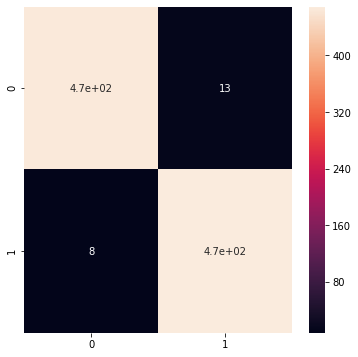

In [16]:
model1.fit(X_train, Y_train)
ypred = model1.predict(X_test)

# evaluating the model
print("Training Accuracy :", model1.score(X_train, Y_train))
print("Testing Accuracy :", model1.score(X_test, Y_test))
#confusion matrix
cm = confusion_matrix(Y_test, ypred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(Y_test, ypred)
print(cr)

Training Accuracy : 0.9961672473867595
Testing Accuracy : 0.9529780564263323
[[451  29]
 [ 16 461]]
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       480
         1.0       0.94      0.97      0.95       477

    accuracy                           0.95       957
   macro avg       0.95      0.95      0.95       957
weighted avg       0.95      0.95      0.95       957



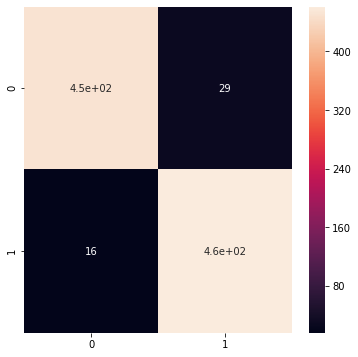

In [17]:
model2.fit(X_train2, Y_train2)
ypred2 = model2.predict(X_test2)

# evaluating the model
print("Training Accuracy :", model2.score(X_train2, Y_train2))
print("Testing Accuracy :", model2.score(X_test2, Y_test2))
#confusion matrix
cm = confusion_matrix(Y_test2, ypred2)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(Y_test2, ypred2)
print(cr)

In [ ]:
model3.fit(X_train3, Y_train3)
ypred3 = model3.predict(X_test3)

# evaluating the model
print("Training Accuracy :", model3.score(X_train3, Y_train3))
print("Testing Accuracy :", model3.score(X_test3, Y_test3))
#confusion matrix
cm = confusion_matrix(Y_test3, ypred3)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)
print(cm)
# classification report
cr = classification_report(Y_test3, ypred3)
print(cr)

#### Picking the best model in the directory for later use

In [ ]:
os.chdir('/Users/shubhamsmac/Desktop/AIProject')
import pickle
filename = 'finalized_model5.sav'
pickle.dump(model1, open(filename, 'wb'))

In [ ]:
from datetime import datetime
import os
import pickle
import random
import time
import warnings
import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import cv2
import numpy as np
from skimage import feature
import glob
import matplotlib.pyplot as plt

#### Unpickling the model from directory

In [ ]:
filename = 'finalized_model5.sav'
    
with open(filename, 'rb') as file:  
    model1 = pickle.load(file)

model1

#### Now we are setting up a directory for Test folder which will contain the unseen images captured from webcam

In [ ]:
os.chdir('/Users/shubhamsmac/Desktop/AIProject/TEST1')

In [ ]:
os.getcwd()

We are using OpenCV's webcam capture feature to get few images with masks and without masks and storing them in the 
test folder

In [ ]:
cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

def rescale_frame(frame, percent=50):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    return cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

while True:
    ret, frame = cam.read()
    frame75 = rescale_frame(frame, percent=50)
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame75)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()
cv2.destroyAllWindows()

In [ ]:
os.chdir('/Users/shubhamsmac/Desktop/AIProject/TEST1')

In [ ]:
TestImg1 = glob.glob('*.png')

In [ ]:
test_feat = []
for i in TestImg1 :
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image = cv2.resize(image, (64,64), interpolation=cv2.INTER_AREA)
    feature_vector = np.array([])
    rhog = feature.hog(image, orientations=9, pixels_per_cell=(8,8), 
                    cells_per_block=(4,4), visualize=True)#block_norm='L2'
    ne = np.expand_dims(rhog, 1)
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
    hist = hog.compute(image, (8,8), (8,8), ((10,20),))
    feature_vector  = np.hstack((feature_vector, hist[:,0]))
    spatial_image = cv2.resize(image,(64,64),interpolation= cv2.INTER_AREA)
    spatial_vector = spatial_image.ravel()
    feature_vector = np.hstack((feature_vector, spatial_vector))
    test_feat.append(feature_vector)

In [ ]:
test_feat = StandardScaler().fit_transform(test_feat)

##### Predicting each images from test folder

In [ ]:
prediction = model1.predict(test_feat)

In [ ]:
pred=prediction.tolist()

In [ ]:
##

In [ ]:
k = 0
while k < len(TestImg1):
    image = cv2.imread(TestImg1[k])
    window_name='Image'
    if pred[k]==0:
        label="No Mask"
    else:
        label= "Mask"
    if label =="Mask":
        color = (0, 255, 0) 
    else:
        color = (0, 0, 255)
    k=k+1
    font = cv2.FONT_HERSHEY_SIMPLEX 
    # draw the prediction on the test image and display it
    image = cv2.putText(image, label, (50, 50), font, 1, color, 2,cv2.LINE_AA)
    cv2.imshow(window_name, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()